In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Use rpy2 to convert R data to Python

In [2]:
import rpy2.robjects as robjects

## 1. Data cleaning

### Load the data, convert to numpy arrays, then to Pandas dataframes

In [3]:
robjects.r['load']('fnma_project.rdata')

R object with classes: ('character',) mapped to:
<StrVector - Python:0x10f65d608 / R:0x7fe19a4bb2e8>
['r_age', 'r_pe..., 'r_wa..., 'r_ac..., 'r_ho..., 'r_ge...]

In [4]:
age = np.array(robjects.r['r_age'])

In [5]:
age_df = pd.DataFrame(age)

In [6]:
perprof = np.array(robjects.r['r_perprof'])

In [7]:
perprof_df = pd.DataFrame(perprof)

In [8]:
way_watch = np.array(robjects.r['r_way_watch'])

In [9]:
way_watch_df = pd.DataFrame(way_watch)

In [10]:
accesstv = np.array(robjects.r['r_accesstv'])

In [11]:
accesstv_df = pd.DataFrame(accesstv)

In [12]:
hours_watched_day = np.array(robjects.r['r_hours_watched_day'])

In [13]:
hours_watched_day_df = pd.DataFrame(hours_watched_day)

In [14]:
genre = np.array(robjects.r['r_genre'])

In [15]:
genre_df = pd.DataFrame(genre)

### For each dataframe transpose, pivot, drop redundant data, name columns

### age

In [16]:
age_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,15,47,35,28,26,40,59,36,32,21,...,21,19,21,18,24,20,20,18,21,24
1,41,972,92,690,875,587,291,335,292,458,...,784,382,430,408,467,710,988,890,176,614


In [17]:
age_df = age_df.T

In [18]:
age_df = age_df.rename(columns={0:'age', 1:'Respondent'})

In [19]:
age_df.sort_values(['Respondent'], inplace=True)

In [20]:
age_df.head()

,age,Respondent
290,33,1
215,25,2
228,35,3
891,32,4
937,49,5


### perprof

In [21]:
perprof_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,a,a,a,a,a,a,a,a,a,a,...,j,j,j,j,j,j,j,j,j,j
1,"Extraverted, enthusiastic","Extraverted, enthusiastic","Extraverted, enthusiastic","Extraverted, enthusiastic","Extraverted, enthusiastic","Extraverted, enthusiastic","Extraverted, enthusiastic","Extraverted, enthusiastic","Extraverted, enthusiastic","Extraverted, enthusiastic",...,"Conventional, uncreative","Conventional, uncreative","Conventional, uncreative","Conventional, uncreative","Conventional, uncreative","Conventional, uncreative","Conventional, uncreative","Conventional, uncreative","Conventional, uncreative","Conventional, uncreative"
2,3,2,7,4,4,7,7,4,6,3,...,1,3,1,3,3,6,1,4,1,5
3,Disagree a little,Disagree moderately,Agree strongly,Neither agree nor disagree,Neither agree nor disagree,Agree strongly,Agree strongly,Neither agree nor disagree,Agree moderately,Disagree a little,...,Disagree strongly,Disagree a little,Disagree strongly,Disagree a little,Disagree a little,Agree moderately,Disagree strongly,Neither agree nor disagree,Disagree strongly,Agree a little
4,41,972,92,690,875,587,291,335,292,458,...,784,382,430,408,467,710,988,890,176,614


In [22]:
perprof_df = perprof_df.T

In [23]:
perprof_df.head()

,0,1,2,3,4
0,a,"Extraverted, enthusiastic",3,Disagree a little,41
1,a,"Extraverted, enthusiastic",2,Disagree moderately,972
2,a,"Extraverted, enthusiastic",7,Agree strongly,92
3,a,"Extraverted, enthusiastic",4,Neither agree nor disagree,690
4,a,"Extraverted, enthusiastic",4,Neither agree nor disagree,875


In [24]:
perprof_values = perprof_df.loc[:, :1]

In [25]:
perprof_values.drop_duplicates(inplace=True)

/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [26]:
perprof_values = perprof_values.rename(columns={0: 'code', 1: 'values'})

In [27]:
perprof_df.drop([1,3], axis=1, inplace=True)

In [28]:
perprof_df = perprof_df.rename(columns={4:'Respondent', 0: 'Perprof'})

In [29]:
perprof_df = perprof_df.pivot(index='Respondent', columns='Perprof', values=2)

In [30]:
perprof_df.reset_index(inplace=True)

In [31]:
perprof_df.columns.name = ''

In [32]:
perprof_df = perprof_df.rename(columns={'a':'perprof_a', 'c':'perprof_c', 'j':'perprof_j'})

In [33]:
perprof_df = perprof_df.astype({'Respondent': int}).sort_values('Respondent')

In [34]:
perprof_df.shape

(1000, 4)

In [35]:
perprof_df.head()

,Respondent,perprof_a,perprof_c,perprof_j
0,1,4,6,1
112,2,4,7,1
223,3,7,7,7
334,4,6,6,6
445,5,6,7,4


### way_watch

In [36]:
way_watch_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,a,b,c,d,e,f,g,h,i,j,...,a,b,c,d,e,f,g,h,i,j
1,"On TV through cable, satellite, or broadcast c...",DVR (within 24 hours of the live broadcast),DVR (24 hours or longer after the live broadcast),Video On Demand (VOD),Streamed to a device and watched on a TV screen,Downloaded to a device and watched on a TV screen,Streamed and watched on a device other than a ...,Downloaded and watched on a device other than ...,DVD/Blu-ray Disc (purchased or rented),Outside the home at a movie theater or other v...,...,"On TV through cable, satellite, or broadcast c...",DVR (within 24 hours of the live broadcast),DVR (24 hours or longer after the live broadcast),Video On Demand (VOD),Streamed to a device and watched on a TV screen,Downloaded to a device and watched on a TV screen,Streamed and watched on a device other than a ...,Downloaded and watched on a device other than ...,DVD/Blu-ray Disc (purchased or rented),Outside the home at a movie theater or other v...
2,1,1,1,0,1,0,0,0,1,0,...,1,1,1,0,1,0,1,0,1,1
3,702,702,702,702,702,702,702,702,702,702,...,601,601,601,601,601,601,601,601,601,601


In [37]:
way_watch_df = way_watch_df.T

In [38]:
pd.set_option('display.max_colwidth', 90)

In [39]:
way_watch_df.head()

,0,1,2,3
0,a,"On TV through cable, satellite, or broadcast channels",1,702
1,b,DVR (within 24 hours of the live broadcast),1,702
2,c,DVR (24 hours or longer after the live broadcast),1,702
3,d,Video On Demand (VOD),0,702
4,e,Streamed to a device and watched on a TV screen,1,702


In [40]:
way_watch_values = way_watch_df.loc[:, :1]

In [41]:
way_watch_values.drop_duplicates(inplace=True)

/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [42]:
way_watch_values = way_watch_values.rename(columns={0: 'code', 1: 'values'})

In [43]:
way_watch_df.drop(way_watch_df.columns[1], axis=1, inplace=True)

In [44]:
way_watch_df = way_watch_df.pivot(index=3, columns=0, values=2)

In [45]:
way_watch_df.reset_index(inplace=True)

In [46]:
way_watch_df = way_watch_df.rename(columns={
                             'a':'way_watch_a', 
                             'b':'way_watch_b', 
                             'c':'way_watch_c', 
                             'd':'way_watch_d',
                             'e':'way_watch_e',
                             'f':'way_watch_f',
                             'g':'way_watch_g',
                             'h':'way_watch_h',
                             'i':'way_watch_i', 
                             'j':'way_watch_j',
                             3: 'Respondent'
                            })

In [47]:
way_watch_df = way_watch_df.astype(int).sort_values('Respondent')

In [48]:
way_watch_df.shape

(1000, 11)

In [49]:
way_watch_df.head()

,Respondent,way_watch_a,way_watch_b,way_watch_c,way_watch_d,way_watch_e,way_watch_f,way_watch_g,way_watch_h,way_watch_i,way_watch_j
0,1,1,0,0,1,0,1,1,1,1,0
112,2,0,0,0,0,0,1,1,1,1,1
223,3,1,0,0,0,0,1,0,1,1,0
334,4,1,0,0,0,0,1,1,0,0,1
445,5,1,1,0,1,1,0,1,0,0,1


### accesstv

In [50]:
accesstv_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13990,13991,13992,13993,13994,13995,13996,13997,13998,13999
0,a,a,a,a,a,a,a,a,a,a,...,p,p,p,p,p,p,p,p,p,p
1,Basic cable service,Basic cable service,Basic cable service,Basic cable service,Basic cable service,Basic cable service,Basic cable service,Basic cable service,Basic cable service,Basic cable service,...,"Network App (such as FXNow, History, Lifetime)","Network App (such as FXNow, History, Lifetime)","Network App (such as FXNow, History, Lifetime)","Network App (such as FXNow, History, Lifetime)","Network App (such as FXNow, History, Lifetime)","Network App (such as FXNow, History, Lifetime)","Network App (such as FXNow, History, Lifetime)","Network App (such as FXNow, History, Lifetime)","Network App (such as FXNow, History, Lifetime)","Network App (such as FXNow, History, Lifetime)"
2,1,1,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,41,972,92,690,875,587,291,335,292,458,...,784,382,430,408,467,710,988,890,176,614


In [51]:
accesstv_df = accesstv_df.T

In [52]:
accesstv_df.head()

,0,1,2,3
0,a,Basic cable service,1,41
1,a,Basic cable service,1,972
2,a,Basic cable service,0,92
3,a,Basic cable service,1,690
4,a,Basic cable service,0,875


In [53]:
accesstv_values = accesstv_df.loc[:, :1]

In [54]:
accesstv_values.drop_duplicates(inplace=True)

/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [55]:
accesstv_values = accesstv_values.rename(columns={0: 'code', 1: 'values'})

In [56]:
accesstv_df.drop(accesstv_df.columns[1], axis=1, inplace=True)

In [57]:
accesstv_df = accesstv_df.pivot(index=3, columns=0, values=2)

In [58]:
accesstv_df.reset_index(inplace=True)

In [59]:
accesstv_df = accesstv_df.rename(columns={
                             'a':'access_a', 
                             'b':'access_b', 
                             'c':'access_c', 
                             'd':'access_d',
                             'e':'access_e',
                             'f':'access_f',
                             'g':'access_g',
                             'h':'access_h',
                             'j':'access_j',
                             'k':'access_k',
                             'l':'access_l',
                             'n':'access_n',
                             'o':'access_o',
                             'p':'access_p',
                              3: 'Respondent'
                            })

In [60]:
accesstv_df = accesstv_df.astype(int).sort_values('Respondent')

In [61]:
accesstv_df.shape

(1000, 15)

In [62]:
accesstv_df.head()

,Respondent,access_a,access_b,access_c,access_d,access_e,access_f,access_g,access_h,access_j,access_k,access_l,access_n,access_o,access_p
0,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0
112,2,0,0,0,0,0,1,1,1,0,0,0,0,0,0
223,3,1,0,0,0,0,1,1,1,0,0,0,0,0,0
334,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1
445,5,0,0,0,1,0,0,1,1,0,0,0,0,0,0


### hours_watched_day

In [63]:
hours_watched_day_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,2,6,3,6,2,3,1,1,5,4,...,0,0,2,2,2,2,5,3,2,5
1,41,972,92,690,875,587,291,335,292,458,...,784,382,430,408,467,710,988,890,176,614


In [64]:
hours_watched_day_df = hours_watched_day_df.T

In [65]:
hours_watched_day_df = hours_watched_day_df.rename(columns={0:'hours_watched', 1:'Respondent'})

In [66]:
hours_watched_day_df.shape

(1000, 2)

In [67]:
hours_watched_day_df.head()

,hours_watched,Respondent
0,2,41
1,6,972
2,3,92
3,6,690
4,2,875


In [68]:
hours_watched_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
hours_watched    1000 non-null int32
Respondent       1000 non-null int32
dtypes: int32(2)
memory usage: 7.9 KB


### genre

In [69]:
genre_df.head()

,0,1,2,3,4,5,6,7,8,9,...,10990,10991,10992,10993,10994,10995,10996,10997,10998,10999
0,a,a,a,a,a,a,a,a,a,a,...,h,h,h,h,h,h,h,h,h,h
1,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,...,News and Current Events,News and Current Events,News and Current Events,News and Current Events,News and Current Events,News and Current Events,News and Current Events,News and Current Events,News and Current Events,News and Current Events
2,3,2,5,5,4,1,5,4,3,3,...,2,3,2,3,5,3,4,5,5,3
3,I'll watch this on occasion 3,2,I love watching this 5,I love watching this 5,4,I have no interest in ever watching this 1,I love watching this 5,4,I'll watch this on occasion 3,I'll watch this on occasion 3,...,2,I'll watch this on occasion 3,2,I'll watch this on occasion 3,I love watching this 5,I'll watch this on occasion 3,4,I love watching this 5,I love watching this 5,I'll watch this on occasion 3
4,170,159,610,419,96,688,458,292,335,291,...,128,876,174,304,614,176,890,988,710,467


In [70]:
genre_df = genre_df.T

In [71]:
genre_df.head()

,0,1,2,3,4
0,a,Drama,3,I'll watch this on occasion 3,170
1,a,Drama,2,2,159
2,a,Drama,5,I love watching this 5,610
3,a,Drama,5,I love watching this 5,419
4,a,Drama,4,4,96


In [72]:
genre_values = genre_df.loc[:, :1]

In [73]:
genre_values.drop_duplicates(inplace=True)

/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [74]:
genre_values = genre_values.rename(columns={0: 'code', 1: 'values'})

In [75]:
genre_df.drop(genre_df.columns[[1, 3]], axis=1, inplace=True)

In [76]:
genre_df = genre_df.pivot(index=4, columns=0, values=2)

In [77]:
genre_df.reset_index(inplace=True)

In [78]:
genre_df = genre_df.rename(columns={
                             'a':'genre_a', 
                             'b':'genre_b', 
                             'c':'genre_c', 
                             'd':'genre_d',
                             'e':'genre_e',
                             'f':'genre_f',
                             'g':'genre_g',
                             'h':'genre_h',
                             'i':'genre_i',
                             'j':'genre_j',
                             'k':'genre_k',
                             4: 'Respondent'
                            })

In [79]:
genre_df = genre_df.astype(int).sort_values('Respondent')

In [80]:
genre_df.shape

(1000, 12)

In [81]:
genre_df.head()

,Respondent,genre_a,genre_b,genre_c,genre_d,genre_e,genre_f,genre_g,genre_h,genre_i,genre_j,genre_k
0,1,4,4,5,2,3,5,1,3,5,3,1
112,2,4,5,5,1,2,2,5,1,2,3,1
223,3,5,5,5,5,5,4,5,5,5,5,5
334,4,5,4,5,4,4,5,5,5,4,5,4
445,5,5,5,3,5,4,4,4,4,4,3,2


### Merge all dataframes into one

In [82]:
survey_df = pd.merge(age_df, perprof_df, on='Respondent')

In [83]:
survey_df.head()

,age,Respondent,perprof_a,perprof_c,perprof_j
0,33,1,4,6,1
1,25,2,4,7,1
2,35,3,7,7,7
3,32,4,6,6,6
4,49,5,6,7,4


In [84]:
survey_df = pd.merge(survey_df, way_watch_df, on='Respondent')

In [85]:
survey_df = pd.merge(survey_df, accesstv_df, on='Respondent')

In [86]:
survey_df = pd.merge(survey_df, hours_watched_day_df, on='Respondent')

In [87]:
survey_df = pd.merge(survey_df, genre_df, on='Respondent')

In [88]:
survey_df.set_index('Respondent', inplace=True)

In [89]:
survey_df = survey_df.astype(int)

In [90]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 40 columns):
age              1000 non-null int64
perprof_a        1000 non-null int64
perprof_c        1000 non-null int64
perprof_j        1000 non-null int64
way_watch_a      1000 non-null int64
way_watch_b      1000 non-null int64
way_watch_c      1000 non-null int64
way_watch_d      1000 non-null int64
way_watch_e      1000 non-null int64
way_watch_f      1000 non-null int64
way_watch_g      1000 non-null int64
way_watch_h      1000 non-null int64
way_watch_i      1000 non-null int64
way_watch_j      1000 non-null int64
access_a         1000 non-null int64
access_b         1000 non-null int64
access_c         1000 non-null int64
access_d         1000 non-null int64
access_e         1000 non-null int64
access_f         1000 non-null int64
access_g         1000 non-null int64
access_h         1000 non-null int64
access_j         1000 non-null int64
access_k         1000 non-null int64
acces

In [91]:
survey_df.shape

(1000, 40)

In [92]:
survey_df.tail()

,age,perprof_a,perprof_c,perprof_j,way_watch_a,way_watch_b,way_watch_c,way_watch_d,way_watch_e,way_watch_f,...,genre_b,genre_c,genre_d,genre_e,genre_f,genre_g,genre_h,genre_i,genre_j,genre_k
Respondent,,,,,,,,,,,,,,,,,,,,,
996,63,4,6,6,1,0,0,0,0,0,...,3,2,5,1,2,5,5,3,3,5
997,59,4,6,5,1,0,0,0,0,0,...,2,2,2,2,2,5,5,2,4,2
998,54,3,7,6,1,0,0,1,0,0,...,3,3,4,1,3,3,4,4,1,1
999,40,4,4,6,1,1,1,1,1,0,...,5,2,4,2,1,2,4,1,2,3
1000,49,2,5,7,1,0,0,0,0,0,...,2,1,1,1,1,1,1,1,1,1


In [93]:
survey_df.describe()

,age,perprof_a,perprof_c,perprof_j,way_watch_a,way_watch_b,way_watch_c,way_watch_d,way_watch_e,way_watch_f,...,genre_b,genre_c,genre_d,genre_e,genre_f,genre_g,genre_h,genre_i,genre_j,genre_k
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,36.929000,4.529000,5.838000,3.497000,0.713000,0.332000,0.355000,0.350000,0.478000,0.269000,...,3.970000,2.950000,3.207000,2.902000,2.666000,3.398000,3.585000,2.796000,2.903000,2.385000
std,14.767465,1.788955,1.252727,1.875502,0.452588,0.471167,0.478753,0.477208,0.499766,0.443662,...,1.069694,1.461381,1.514082,1.289208,1.281439,1.226009,1.160225,1.331975,1.290448,1.427169
min,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,24.000000,3.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000
50%,36.000000,5.000000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000
75%,49.000000,6.000000,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,64.000000,7.000000,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## 2. Exploratory data analysis

### Mean age of survey respondents is 36.9 years (ranges from 12 to 64 years)

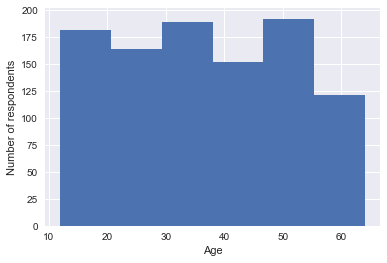

In [94]:
plt.hist(survey_df['age'], bins=6)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

Add age ranges to convert continuous age data points to categorical

In [95]:
survey_df['age_group'] = '50+'
survey_df.loc[(survey_df['age'] < 50) & (survey_df['age'] > 39), 'age_group'] = '40-49'
survey_df.loc[(survey_df['age'] < 40) & (survey_df['age'] > 29), 'age_group'] = '30-39'
survey_df.loc[(survey_df['age'] < 30) & (survey_df['age'] > 19), 'age_group'] = '20-29'
survey_df.loc[(survey_df['age'] < 20), 'age_group'] = '12-19'

In [96]:
survey_df = pd.get_dummies(survey_df, columns=['age_group'])

In [97]:
survey_df.drop('age', axis=1, inplace=True)

In [98]:
survey_df.head()

,perprof_a,perprof_c,perprof_j,way_watch_a,way_watch_b,way_watch_c,way_watch_d,way_watch_e,way_watch_f,way_watch_g,...,genre_g,genre_h,genre_i,genre_j,genre_k,age_group_12-19,age_group_20-29,age_group_30-39,age_group_40-49,age_group_50+
Respondent,,,,,,,,,,,,,,,,,,,,,
1,4,6,1,1,0,0,1,0,1,1,...,1,3,5,3,1,0,0,1,0,0
2,4,7,1,0,0,0,0,0,1,1,...,5,1,2,3,1,0,1,0,0,0
3,7,7,7,1,0,0,0,0,1,0,...,5,5,5,5,5,0,0,1,0,0
4,6,6,6,1,0,0,0,0,1,1,...,5,5,4,5,4,0,0,1,0,0
5,6,7,4,1,1,0,1,1,0,1,...,4,4,4,3,2,0,0,0,1,0


## What are the most common answers for personality profile, ways watched, and access? What are the most popular genres?

Print code/values for each category, for reference:

In [99]:
perprof_values

,code,values
0,a,"Extraverted, enthusiastic"
1000,c,"Dependable, self-disciplined"
2000,j,"Conventional, uncreative"


In [100]:
way_watch_values

,code,values
0,a,"On TV through cable, satellite, or broadcast channels"
1,b,DVR (within 24 hours of the live broadcast)
2,c,DVR (24 hours or longer after the live broadcast)
3,d,Video On Demand (VOD)
4,e,Streamed to a device and watched on a TV screen
5,f,Downloaded to a device and watched on a TV screen
6,g,"Streamed and watched on a device other than a TV (tablet, smartphone, computer etc.)"
7,h,"Downloaded and watched on a device other than a TV (tablet, smartphone, computer etc.)"
8,i,DVD/Blu-ray Disc (purchased or rented)
9,j,Outside the home at a movie theater or other venue


In [101]:
accesstv_values

,code,values
0,a,Basic cable service
1000,b,Over-the-air for free using an antenna
2000,c,"Digital cable service (comes with an on-screen, interactive program guide and provides..."
3000,d,Satellite television (such as DirecTV or DISH Network)
4000,e,"Television service provided by a telephone company, such as FiOS or U-verse"
5000,f,Hulu Plus
6000,g,Netflix
7000,h,Amazon Prime
8000,j,Crackle
9000,n,Sling TV


In [102]:
genre_values

,code,values
0,a,Drama
1000,d,Sports
2000,e,Game Shows
3000,f,Talk Shows
4000,i,Entertainment News
5000,j,Lifestyle or How-to
6000,k,eSports
7000,b,Comedy
8000,c,Reality
9000,g,Documentaries


Personality profiles:

In [103]:
perprof = survey_df[[col for col in list(survey_df) if col.startswith('perprof')]].sum()

In [104]:
perprof_values['total'] = perprof.values

In [105]:
perprof_values.sort_values('total', ascending=False, inplace=True)

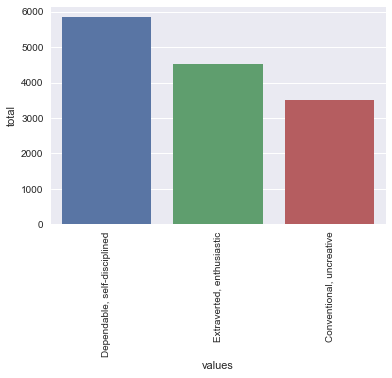

In [106]:
plot = sns.barplot(x='values', y='total', data=perprof_values)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plot.set(ylabel='total')

Ways watched:

In [107]:
ways_watched = survey_df[[col for col in list(survey_df) if col.startswith('way')]].sum()

In [108]:
way_watch_values['total'] = ways_watched.values

In [109]:
way_watch_values.sort_values('total', ascending=False, inplace=True)

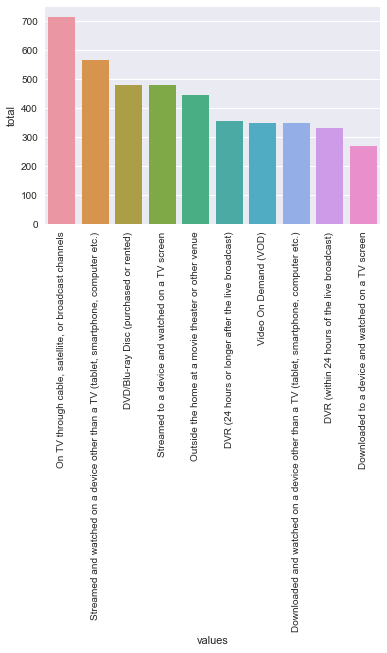

In [110]:
plot = sns.barplot(x='values', y='total', data=way_watch_values)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plot.set(ylabel='total')

Access:

In [111]:
access = survey_df[[col for col in list(survey_df) if col.startswith('access')]].sum()

In [112]:
accesstv_values['total'] = access.values

In [113]:
accesstv_values.sort_values('total', ascending=False, inplace=True)

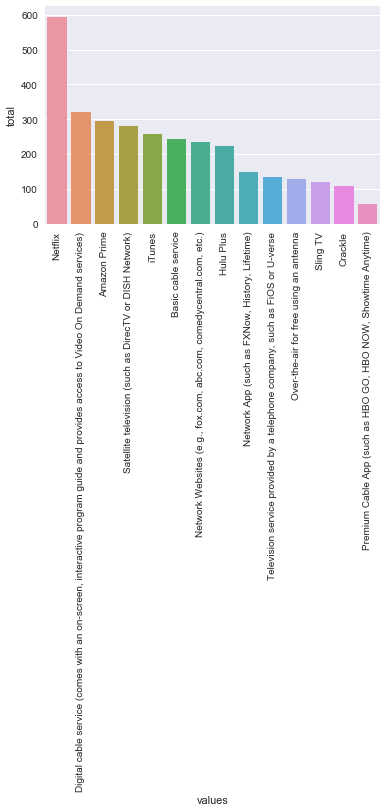

In [114]:
plot = sns.barplot(x='values', y='total', data=accesstv_values)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plot.set(ylabel='total')

Genres:

In [115]:
genres = survey_df[[col for col in list(survey_df) if col.startswith('genre')]].sum()

In [116]:
genre_values['total'] = genres.values

In [117]:
genre_values.sort_values('total', ascending=False, inplace=True)

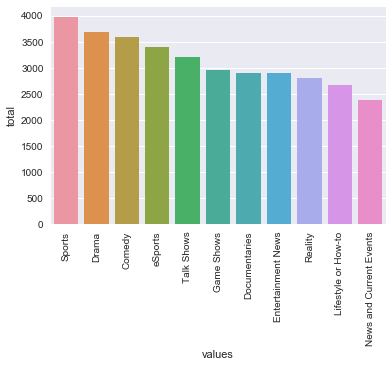

In [118]:
plot = sns.barplot(x='values', y='total', data=genre_values)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plot.set(ylabel='total')

## 3. Explore some questions and look for patterns

1. What are the typical viewing habits (hours, way, access) for the different age and personality groups?
2. Is there a correlation between age, personality, and genre preferences?
3. Can we determine what shows and networks to target for specific types of ads, based on correlations between these and age/personality? (i.e. discover distinct groups through clustering and use these groups to develop targeted advertising)

We can do some simple aggregations to look at correlations among chosen variables, for example we can see how people who rated themselves high for personality 'a' responded to the other questions:

In [119]:
survey_df[survey_df['perprof_a'] > 4].groupby(by='perprof_a').sum()

,perprof_c,perprof_j,way_watch_a,way_watch_b,way_watch_c,way_watch_d,way_watch_e,way_watch_f,way_watch_g,way_watch_h,...,genre_g,genre_h,genre_i,genre_j,genre_k,age_group_12-19,age_group_20-29,age_group_30-39,age_group_40-49,age_group_50+
perprof_a,,,,,,,,,,,,,,,,,,,,,
5,1155,704,150,67,81,72,99,57,109,63,...,669,720,550,582,471,30,39,37,44,48
6,1130,652,129,63,66,69,84,51,103,69,...,649,687,563,585,487,32,39,44,30,41
7,1014,540,106,64,61,61,83,63,95,68,...,594,639,537,544,503,25,35,42,28,28


We can also make a correlation matrix to find correlations among the variables:

In [120]:
corr = survey_df.corr()

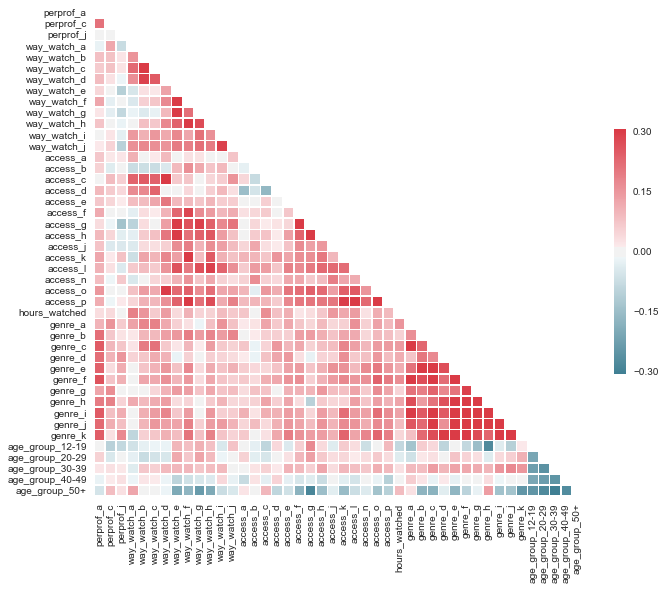

In [121]:
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This is hard to interpret with so many variables, but gives some idea of correlations. We can also make a dataframe of the correlation values:

In [122]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())
    
# credit: https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas

This is also difficult to interpret. Maybe we can look at the top correlations:

In [123]:
corr_abs = survey_df.corr().abs()

In [124]:
os = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

In [125]:
os[:40]

way_watch_b      way_watch_c      0.626324
genre_f          genre_i          0.619225
genre_e          genre_f          0.582449
genre_d          genre_k          0.557887
genre_c          genre_i          0.536260
genre_e          genre_i          0.501906
genre_c          genre_f          0.495671
genre_i          genre_j          0.464271
genre_f          genre_j          0.453155
way_watch_f      way_watch_h      0.450017
genre_g          genre_h          0.448388
genre_c          genre_e          0.446353
way_watch_e      access_g         0.440546
genre_i          genre_k          0.426813
genre_c          genre_j          0.412511
genre_h          genre_i          0.407645
genre_e          genre_j          0.402826
genre_f          genre_h          0.399516
genre_e          genre_k          0.396463
access_l         access_p         0.391431
genre_f          genre_k          0.380728
genre_g          genre_j          0.374311
genre_a          genre_i          0.352167
genre_h    

In [126]:
os[100:140]

genre_b          genre_c            0.229562
                 genre_j            0.229216
age_group_12-19  age_group_30-39    0.229192
access_n         access_p           0.229187
access_h         access_l           0.228468
genre_b          genre_k            0.227886
perprof_a        genre_j            0.227779
way_watch_e      access_o           0.227670
access_h         access_o           0.226300
way_watch_a      way_watch_c        0.225837
access_j         access_l           0.223667
genre_d          genre_f            0.221919
access_k         access_l           0.220924
way_watch_h      access_o           0.219691
perprof_a        genre_d            0.218964
access_k         genre_i            0.218706
access_f         access_o           0.218590
access_o         genre_i            0.217756
way_watch_g      way_watch_j        0.216866
perprof_a        genre_b            0.215968
way_watch_f      way_watch_g        0.215029
                 access_h           0.214280
way_watch_

There's still a lot of within category correlation at the top of the list, but if we show lower scoring correlations we can see some emerge between ways watched and access, and between personality types and genres. The former might not be very relevant for targeted advertising but the latter could be. Interestingly, age groups don't seem to correlate strongly with other variables.

Let's try reducing the dimensionality of the data with PCA:

In [127]:
# scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
survey_scaled = scaler.fit_transform(survey_df)

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
survey_pca = pca.fit_transform(survey_scaled)

In [129]:
pca.explained_variance_ratio_

array([ 0.1423002 ,  0.07096497,  0.05356512,  0.0389279 ])

This shows that the first principal component explains 14% of the variance, the second 7%, the third 5%, and so on

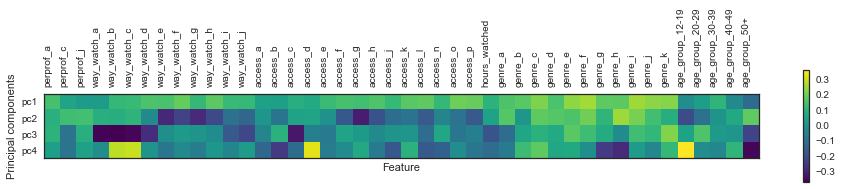

In [130]:
plt.matshow(pca.components_[0:5], cmap='viridis')
plt.yticks([0,1,2,3], ['pc1', 'pc2', 'pc3', 'pc4'])
plt.colorbar()
plt.xticks(range(len(survey_df.columns)),
          survey_df.columns, rotation=90, ha='right')
plt.xlabel('Feature')
plt.ylabel('Principal components')

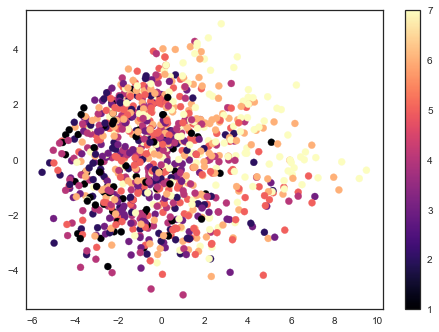

In [131]:
plt.scatter(survey_pca[:,0], survey_pca[:,1], c=survey_df['perprof_a'], cmap='magma')
plt.colorbar()

Scree plot explained variance of the principal components and the cumulative explained variance:

In [132]:
evr = pca.explained_variance_ratio_
x = list(range(len(evr)))

<Container object of 4 artists>

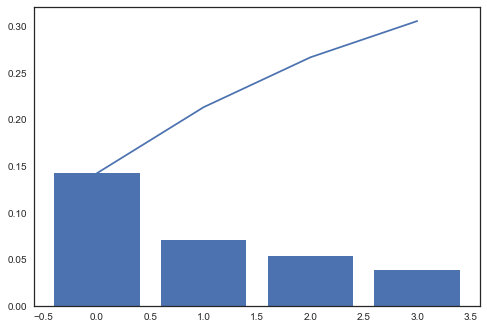

In [133]:
plt.plot(x, np.cumsum(evr))
plt.bar(x, evr)

We can see from the plot that four components don't explain much of the variance!

Use K-means to find clusters and sillhouette scores/plots to find optimal number of clusters:

In [134]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

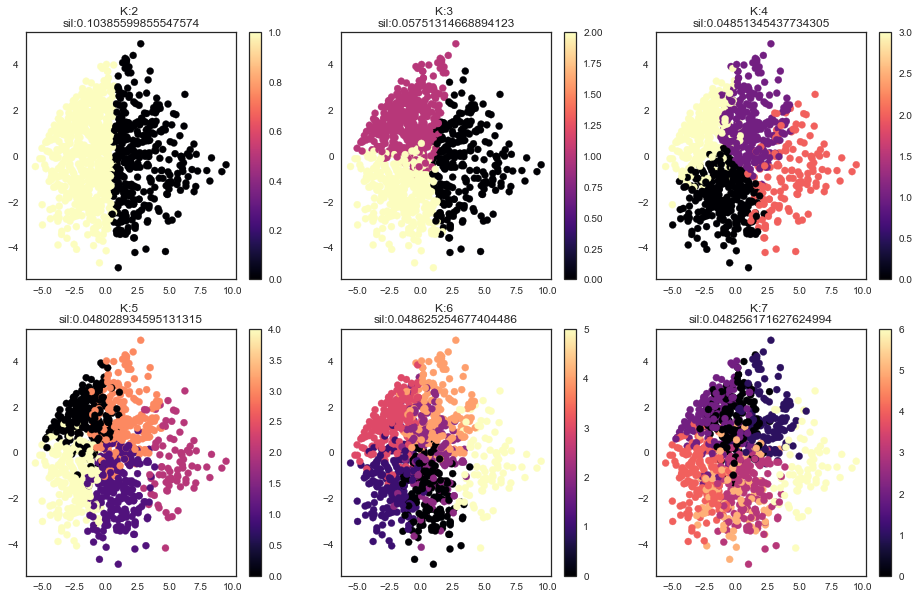

In [135]:
ks = []
sils = []
plt.figure(figsize=(16,10))
for i,k  in enumerate(range(2,8)):
    km = KMeans(n_clusters=k)
    km.fit(survey_scaled)
    plt.subplot(231+i)
    plt.scatter(survey_pca.T[0], survey_pca.T[1], c=km.labels_, cmap='magma')
    plt.title('K:{} \nsil:{}'.format(k, silhouette_score(survey_scaled, km.labels_)))
    plt.colorbar()
    ks.append(k)
    sils.append(silhouette_score(survey_scaled, km.labels_))

The silhouette scores (on a scale from 1 to -1) are pretty low and don't look like well-defined clusters - maybe the data aren't clustering well. Could be because of difficulty reducing dimensions with PCA and requiring large number of components to explain the variance.

### Other information that would enhance this analysis:
1. Information about when survey respondents watch TV
2. Other demographic information such as gender, education, income could be relevant
3. Information about what products or services (verticals) survey respondents are interested in could definitely aid in targeting ad campaigns 

### Challenges:
1. The expanded/merged dataset is highly dimensional (44 variables) which poses difficulties in clustering. Especially difficult to analyze multi-factor questions (scale of 1 to 7, for example, or pick all that apply, rather than simple 'yes' or 'no' questions). 
2. Eliminate effects of within category correlations i.e. genres highly correlated with other genres